# spacy库的使用
参考：[如何用Python处理自然语言](http://blog.sciencenet.cn/blog-377709-1113703.html)

根据[官网](https://spacy.io/usage/)进行安装

In [1]:
import spacy     # 导入函数库

In [2]:
text = "The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013."

In [3]:
print(text)

The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.


### 1. 分析文本

In [5]:
nlp = spacy.load('en')                       # 加载英语模型
doc = nlp(text)
doc

The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.

In [6]:
for token in doc[:10]:
    print('"{}"'.format(token.text))         # 输出序列的每个词(token，包括符号)

"The"
"sequel"
","
"Yes"
","
"Prime"
"Minister"
","
"ran"
"from"


### 2. 显示文本的各属性

In [7]:
for token in doc[:10]:
    print('{0:<10}{1:<5}{2:<10}{3}\t{4}\t{5:<7}{6:<7}{7:<5}'.format(
        token.text,                 # 文本
        token.idx,                  # 索引值，按照字母序号，在原文中的定位(包括空格)
        token.lemma_,               # 词元
        token.is_punct,             # 是否为标点 punctuation
        token.is_space,             # 是否是空格
        token.shape_,               # 形状，主要针对大小写
        token.pos_,                 # 词性
        token.tag_                  # 标记
    ))

The       0    the       False	False	Xxx    DET    DT   
sequel    4    sequel    False	False	xxxx   NOUN   NN   
,         10   ,         True	False	,      PUNCT  ,    
Yes       12   yes       False	False	Xxx    INTJ   UH   
,         15   ,         True	False	,      PUNCT  ,    
Prime     17   prime     False	False	Xxxxx  PROPN  NNP  
Minister  23   minister  False	False	Xxxxx  PROPN  NNP  
,         31   ,         True	False	,      PUNCT  ,    
ran       33   run       False	False	xxx    VERB   VBD  
from      37   from      False	False	xxxx   ADP    IN   


### 3. 输出实体词汇

In [8]:
# cardinal:基数    org：机构
for ent in doc.ents:
    print('{:<20}{:<10}'.format(ent.text, ent.label_))

1986 to 1988        DATE      
38                  CARDINAL  
one                 CARDINAL  
half an hour        TIME      
Jim Hacker          PERSON    
BBC Radio           ORG       
2010                DATE      
UKTV Gold           ORG       
2013                DATE      


In [9]:
# 显示实体词汇
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

### 4. 将段落拆解为语句

In [10]:
for sentence in doc.sents: 
    print(sentence)
    print()

The sequel, Yes, Prime Minister, ran from 1986 to 1988.

In total there were 38 episodes, of which all but one lasted half an hour.

Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.

Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.



In [11]:
print(doc.sents)             # 注意doc.sents是生成器
print()
print(list(doc.sents))       # 先转换为list再进行操作


[The sequel, Yes, Prime Minister, ran from 1986 to 1988., In total there were 38 episodes, of which all but one lasted half an hour., Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker., Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.]


### 5. 处理单独的句子

In [12]:
newdoc = nlp(list(doc.sents)[0].text)          # 将首句提出来进行分析
newdoc

The sequel, Yes, Prime Minister, ran from 1986 to 1988.

#### 5.1 分析词例的依赖关系

In [13]:
for token in newdoc:
    print('({0:<10}{1:<5})  <--{2:<8}--  ({3:<10}{4:<5})'.format(
        token.text,                        # 句子文本 
        token.tag_,                        # 标记
        token.dep_,                        # 依赖
        token.head.text,                   # head的文本
        token.head.tag_                    # head的标记
    ))

(The       DT   )  <--det     --  (sequel    NN   )
(sequel    NN   )  <--nsubj   --  (ran       VBD  )
(,         ,    )  <--punct   --  (sequel    NN   )
(Yes       UH   )  <--intj    --  (sequel    NN   )
(,         ,    )  <--punct   --  (sequel    NN   )
(Prime     NNP  )  <--compound--  (Minister  NNP  )
(Minister  NNP  )  <--appos   --  (sequel    NN   )
(,         ,    )  <--punct   --  (sequel    NN   )
(ran       VBD  )  <--ROOT    --  (ran       VBD  )
(from      IN   )  <--prep    --  (ran       VBD  )
(1986      CD   )  <--pobj    --  (from      IN   )
(to        IN   )  <--prep    --  (from      IN   )
(1988      CD   )  <--pobj    --  (to        IN   )
(.         .    )  <--punct   --  (ran       VBD  )


#### 5.2 可视化依赖关系

## 注意！！！
修改D:\ProgramData\Anaconda3\Lib\site-packages\spacy的util.py文件，将486行中`return msgpack.dumps(serialized, use_bin_type=True, encoding='utf8')`的encoding='utf8'去掉

否则会出现[TypeError: __init__() got an unexpected keyword argument 'encoding'](https://github.com/explosion/spaCy/issues/2868)错误

In [14]:
newdoc = nlp(list(doc.sents)[0].text)
displacy.render(newdoc, style='dep', jupyter=True, options={'distance': 90})

---

### 6. 词嵌入分析语义
需导入的模型快捷方式在`D:\ProgramData\Anaconda3\Lib\site-packages\spacy\data`路径下，模型存在`C:\Users\David\AppData\Local\pip\cache\wheels`路径下

安装方法参考：[spaCy下载模型en_core_web失败：Read timed out](https://blog.csdn.net/wmq104/article/details/82766318)

In [17]:
nlp = spacy.load('en_core_web_lg')               # 导入word2vec模型

In [25]:
word_vector = nlp.vocab['minister'].vector       # 进行词嵌入 维度：(300,)
word_vector[:20]

array([-0.32239 ,  0.38982 ,  0.64522 ,  0.087596,  0.40262 , -0.41253 ,
        0.13804 , -0.40226 , -0.30679 ,  3.652   , -0.61745 , -0.24114 ,
        0.17488 , -0.25995 , -0.38512 , -0.13747 , -0.37446 , -0.80867 ,
        0.28081 ,  0.29735 ], dtype=float32)

#### 6.1 比较词语相似性

In [34]:
dog = nlp.vocab['dog']
cat = nlp.vocab['cat']
apple = nlp.vocab['apple']
orange = nlp.vocab['orange']
print('1.dog vs cat:', dog.similarity(cat))     # 比较词语间的相似性，但similarity只计算词典中向量
print('2.dog vs apple:', dog.similarity(apple))
print('3.apple vs orange:', apple.similarity(orange))

1.dog vs cat: 0.80168545
2.dog vs apple: 0.2633902
3.apple vs orange: 0.5618917


In [45]:
from scipy.spatial.distance import cosine               # 使用余弦函数计算相似度
similarity = 1- cosine(dog.vector, cat.vector)
print('1.cosine similarity:', similarity)                      # 两种方法得到的结果差不多
print('2.spacy similarity:', dog.similarity(cat))

1.cosine similarity: 0.8016855120658875
2.spacy similarity: 0.80168545


#### 6.2 词语向量间的运算
例子：guess_word = king -queen + woman

In [52]:
def vector_similarity(x, y):                      # 计算余弦相似性
    return 1 - cosine(x,y)
def make_guess_word(words):                       # 获取运算后的词向量
    [first, second, third] = words
    return nlp.vocab[first].vector - nlp.vocab[second].vector + nlp.vocab[third].vector
def get_similar_word(words, scope=nlp.vocab):     #  搜索相似词语
    guess_word = make_guess_word(words)
    
    similarities = []
    for word in scope:                            # 在全局范围内找相似向量
        if not word.has_vector:                   # 该单词有词向量
            continue
        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))
    similarities = sorted(similarities, key=lambda x:x[1], reverse=True)   # 从大到小排序
    print([word[0].text for word in similarities[:10]])

In [59]:
%%time
words = ['king', 'queen', 'woman']
get_similar_word(words)

['MAN', 'Man', 'mAn', 'MAn', 'MaN', 'man', 'mAN', 'WOMAN', 'womAn', 'WOman']
Wall time: 31.3 s


In [60]:
%%time
words = ['Pairs', 'London', 'England']
get_similar_word(words)

['PAIRS', 'pairs', 'Pairs', 'pair', 'PAIR', 'Pair', 'paired', 'PAIRED', 'Paired', 'IDENTICAL']
Wall time: 31.7 s


In [61]:
len(nlp.vocab)                                # 字典大小

1344233

#### 6.3 词嵌入可视化

In [62]:
import numpy as np

In [74]:
word_list = []                    # 需要演示的列表
for token in doc:                 # 开头的text文本
    # 当token不是标点且没有在词汇表中才进行添加
    if not(token.is_punct) and not(token.text in word_list):
        word_list.append(token.text)
print(word_list, len(word_list))

['The', 'sequel', 'Yes', 'Prime', 'Minister', 'ran', 'from', '1986', 'to', '1988', 'In', 'total', 'there', 'were', '38', 'episodes', 'of', 'which', 'all', 'but', 'one', 'lasted', 'half', 'an', 'hour', 'Almost', 'ended', 'with', 'a', 'variation', 'the', 'title', 'series', 'spoken', 'as', 'answer', 'question', 'posed', 'by', 'same', 'character', 'Jim', 'Hacker', 'Several', 'adapted', 'for', 'BBC', 'Radio', 'and', 'stage', 'play', 'was', 'produced', 'in', '2010', 'latter', 'leading', 'new', 'television', 'on', 'UKTV', 'Gold', '2013'] 63


In [82]:
# 将每个词汇对应的嵌入向量保存到嵌入矩阵中
embedding = np.zeros([len(word_list), 300])          # 先创建空矩阵 (63,300)
for i, word in enumerate(word_list):
#     embedding[i] = np.append(embedding, nlp.vocab[word].vector)
    embedding[i] = nlp.vocab[word].vector            # (300,)
print(embedding, embedding.shape)

[[ 0.27204001 -0.06203    -0.1884     ...  0.13015001 -0.18317001
   0.1323    ]
 [ 0.14253999 -0.45322999 -0.27893999 ... -0.24725001 -0.45203999
   0.17431   ]
 [-0.13747001  0.19227999 -0.53451997 ... -0.039257   -0.13017
  -0.14871   ]
 ...
 [ 0.68823999 -0.29369     0.14425001 ... -0.44117001 -0.22014999
  -0.29587001]
 [-0.19140001 -0.071784    0.49133    ... -0.58276999 -0.051528
   0.59271002]
 [ 0.35486001  0.15902001  0.77482998 ... -0.18777999  0.20765001
   0.78201002]] (63, 300)


In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE()               # 将高维向量压缩为2维向量，可以在平面上绘图
low_dim_embedding = tsne.fit_transform(embedding)

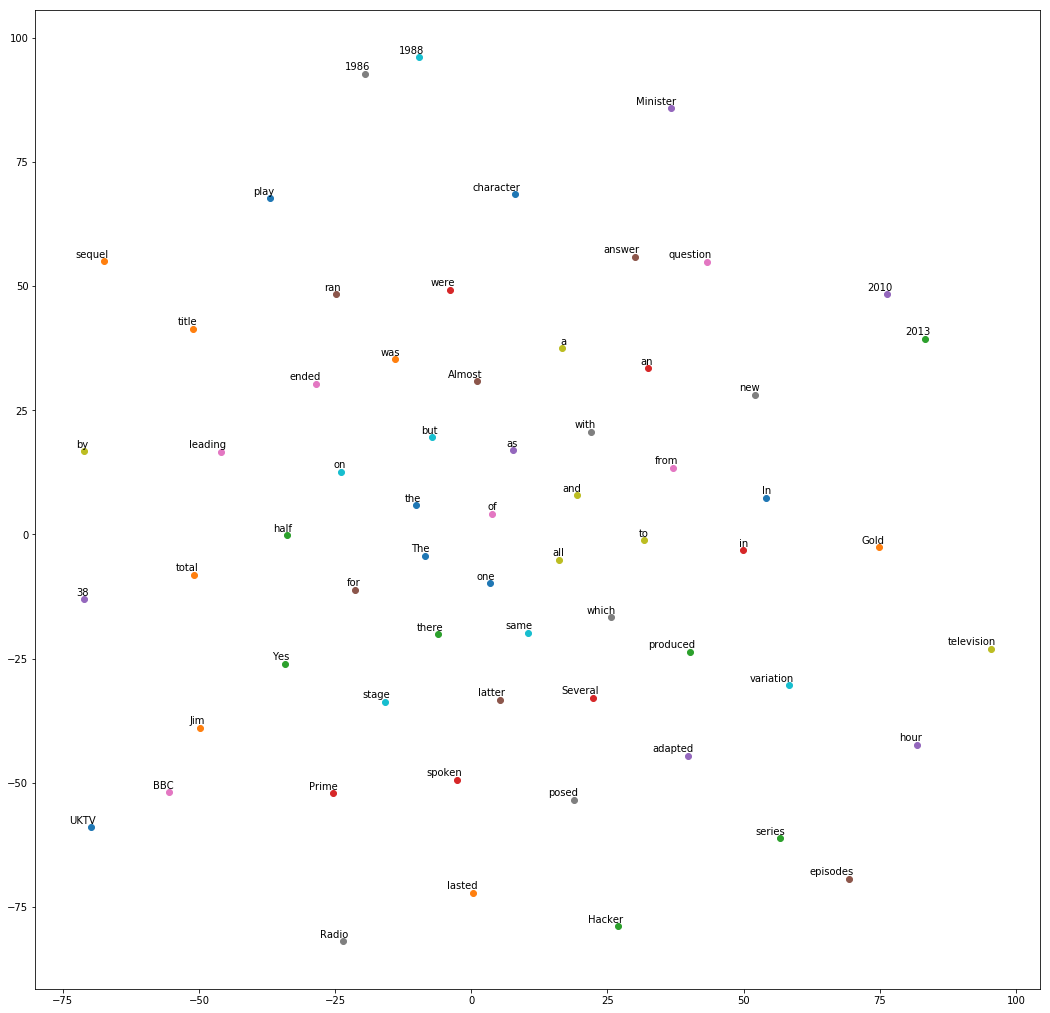

In [97]:
def plot_wordvec(low_dim_embed, labels, filename='tsne.pdf'):
    assert low_dim_embed.shape[0] == len(labels), 'labels and samples do not match'
    plt.figure(figsize=(18,18))
    for i, label in enumerate(labels):
        x, y = low_dim_embed[i,:]
#         plt.xlim(-200,200)                           # 限定坐标显示范围
#         plt.ylim(-200,200)
        plt.scatter(x,y)                               # 画散点图
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', 
                    ha='right', va='bottom')           # 标注
    plt.show()
#     plt.savefig(filename)
plot_wordvec(low_dim_embedding, word_list)